D#oes changes in VIX, SLOPE, VXXBEN provide any useful predictive information about the price of SPXT, UVXY or VIX 1,5,10 days out.
Does the absolute value of VIX, SLOPE, VXXBEN provide information about the price of SPXT, UVXY or VIX 1,5,10 days out.
Analysis of correlation of VXXBEN and Slope.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as web

In [4]:
from scipy import stats
import statsmodels.api as sm

In [6]:
vix_data = pd.read_excel("/Users/admin/Desktop/python/datasets/jeff/analyzed_data.xlsx")

In [7]:
vix_data.tail()

,dates,UVXY,SPXT,VIXXBEN,UX1,UX2,UX3,UX4,VIX,SLOPE
3241,2019-09-10,27.30,298.13,2.2625,16.225,17.675,18.025,17.875,15.20,0.715
3242,2019-09-11,26.61,300.25,2.4725,15.725,17.325,17.825,17.725,14.61,0.833
3243,2019-09-12,25.65,301.29,2.1575,14.975,17.025,17.625,17.575,14.22,0.936
3244,2019-09-13,25.11,301.09,2.3025,14.475,16.875,17.575,17.625,13.74,1.087
3245,2019-09-16,25.65,300.16,1.2575,14.625,17.275,17.925,17.925,14.67,0.981


In [8]:
# WE will run a quick analyis of each security and VIX, SLOPE, VXXBEN to SPXT, UVXY or VIX 
# lets start with running a graph displaying Vix and SPXT 

In [119]:
raw_data = vix_data.set_index("dates")
raw_data.corr()

,UVXY,SPXT,VIXXBEN,UX1,UX2,UX3,UX4,VIX,SLOPE
UVXY,1.000000,-0.475047,-0.357159,0.785337,0.770733,0.736403,0.700645,0.771315,-0.563759
SPXT,-0.475047,1.000000,0.091180,-0.593727,-0.651158,-0.683749,-0.705426,-0.557329,0.115901
VIXXBEN,-0.357159,0.091180,1.000000,-0.457664,-0.324760,-0.264291,-0.227240,-0.612046,0.882427
UX1,0.785337,-0.593727,-0.457664,1.000000,0.979682,0.955917,0.935743,0.982393,-0.659191
UX2,0.770733,-0.651158,-0.324760,0.979682,1.000000,0.993003,0.982172,0.942683,-0.508834
UX3,0.736403,-0.683749,-0.264291,0.955917,0.993003,1.000000,0.995983,0.911452,-0.423271
UX4,0.700645,-0.705426,-0.227240,0.935743,0.982172,0.995983,1.000000,0.887157,-0.368543
VIX,0.771315,-0.557329,-0.612046,0.982393,0.942683,0.911452,0.887157,1.000000,-0.754436
SLOPE,-0.563759,0.115901,0.882427,-0.659191,-0.508834,-0.423271,-0.368543,-0.754436,1.000000


In [19]:
raw_data.tail()

,UVXY,SPXT,VIXXBEN,UX1,UX2,UX3,UX4,VIX,SLOPE
dates,,,,,,,,,
2019-09-10,27.30,298.13,2.2625,16.225,17.675,18.025,17.875,15.20,0.715
2019-09-11,26.61,300.25,2.4725,15.725,17.325,17.825,17.725,14.61,0.833
2019-09-12,25.65,301.29,2.1575,14.975,17.025,17.625,17.575,14.22,0.936
2019-09-13,25.11,301.09,2.3025,14.475,16.875,17.575,17.625,13.74,1.087
2019-09-16,25.65,300.16,1.2575,14.625,17.275,17.925,17.925,14.67,0.981


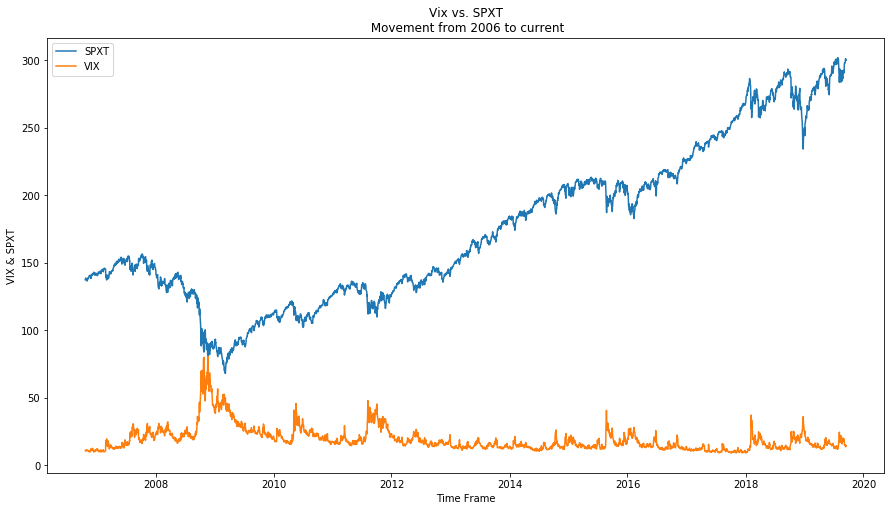

In [15]:
plt.figure(figsize=(15,8))
plt.plot(raw_data.index[0:], raw_data["SPXT"], label = "SPXT")
plt.plot(raw_data.index[0:], raw_data["VIX"], label = "VIX")
plt.xlabel("Time Frame")
plt.ylabel("VIX & SPXT")
plt.title("Vix vs. SPXT\n Movement from 2006 to current")
plt.legend()
plt.show()

It appears that when there is an inverse correlation between VIX and SPXT. As the the S&P 500 increases Vix moves in the opposite direction. In 2018 we see the opposite in movement in both the S&P and ViX. 

Lets run a linear regresson to see the predictability of the S&P based on the movement of ViX

In [16]:
x_constant = sm.add_constant(raw_data["VIX"])
y = raw_data["SPXT"]
model = sm.OLS(y, x_constant).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SPXT   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     1462.
Date:                Sat, 16 Nov 2019   Prob (F-statistic):          2.42e-264
Time:                        15:24:40   Log-Likelihood:                -17225.
No. Observations:                3246   AIC:                         3.445e+04
Df Residuals:                    3244   BIC:                         3.447e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        244.0507      1.987    122.841      0.000     240.155     247.946
VIX           -3.5593      0.093    -38.232      0.000      -3.742      -3.377
==============================================================================
Omnibus:                      276.541   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.456
Skew:                           0.694   Prob(JB):                     1.15e-64
Kurtosis:                       2.502   Cond. No.                         49.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Summary of resaults: From the summary of the model above we see that only 31% of SPXT can be explained by the movement of VIX. This is based on the R_Squared value of .31 collected in this analysis. Also a Beta_value of -3.5593 tells us that the slope is negative and that SPXT moves in the opposite direction of VIX

Lets get the regression line for the model so that we can make future preditions based on the data we have collected. y = Beta + alpha * X

In [13]:
regressionLine = model.predict()
regressionLine

array([204.6131674 , 205.68097091, 206.10809231, ..., 193.43682397,
       195.14530959, 191.8351187 ])

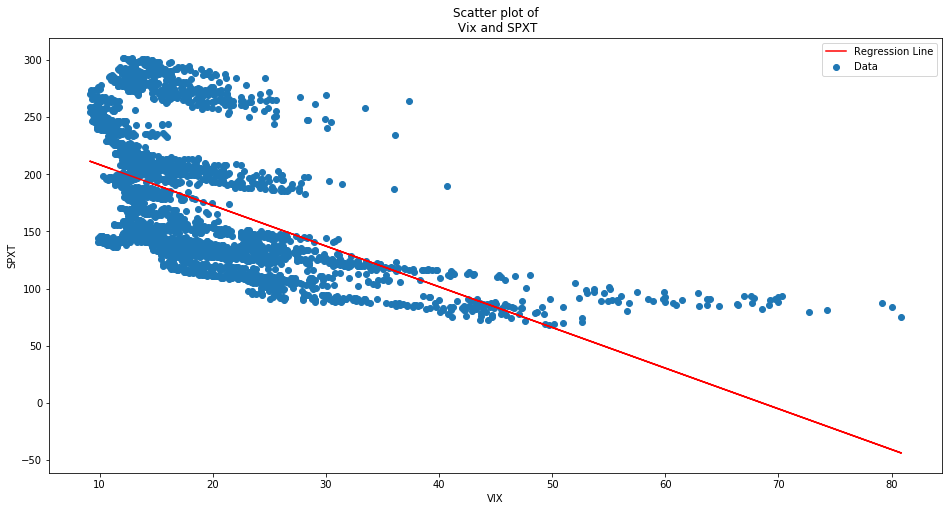

In [35]:
plt.figure(figsize=(16,8))
plt.scatter(raw_data["VIX"], raw_data["SPXT"], label = "Data")
plt.plot(raw_data["VIX"], regressionLine, label = "Regression Line", color = "r")
plt.title('Scatter plot of\n Vix and SPXT')
plt.xlabel("VIX")
plt.ylabel("SPXT")
plt.legend()

SLOPE VS SPXT

<Figure size 1152x576 with 0 Axes>

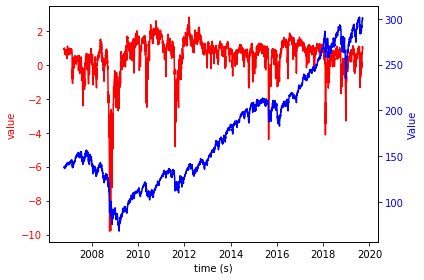

In [77]:
plt.figure(figsize=(16,8))
fig, ax1 = plt.subplots()
ax1.set_xlabel('time (s)')
ax1.set_ylabel('value', color="r")
ax1.plot(raw_data.index[0:], raw_data["SLOPE"], color="r")
ax1.tick_params(axis='y', labelcolor="r")

color = "b"
ax2 = ax1.twinx()
ax2.set_ylabel('Value', color=color)  # we already handled the x-label with ax1
ax2.plot(raw_data.index[0:], raw_data["SPXT"], color="b")
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()

In [67]:
#lets do a linear regression between slope and SPXT

x_cons = sm.add_constant(raw_data["SPXT"])
y = raw_data["SLOPE"]
model = sm.OLS(y, x_cons).fit()

In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SLOPE   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     44.17
Date:                Sat, 16 Nov 2019   Prob (F-statistic):           3.52e-11
Time:                        16:12:30   Log-Likelihood:                -5090.8
No. Observations:                3246   AIC:                         1.019e+04
Df Residuals:                    3244   BIC:                         1.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1280      0.064      1.993      0.046       0.002       0.254
SPXT           0.0023      0.000      6.646      0.000       0.002       0.003
==============================================================================
Omnibus:                     2304.338   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48567.932
Skew:                          -3.135   Prob(JB):                         0.00
Kurtosis:                      20.882   Cond. No.                         583.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#lets get the regression line
regres_line = model.predict()
regres_line

array([0.44486437, 0.4458095 , 0.44689294, ..., 0.82250045, 0.82203942,
       0.81989559])

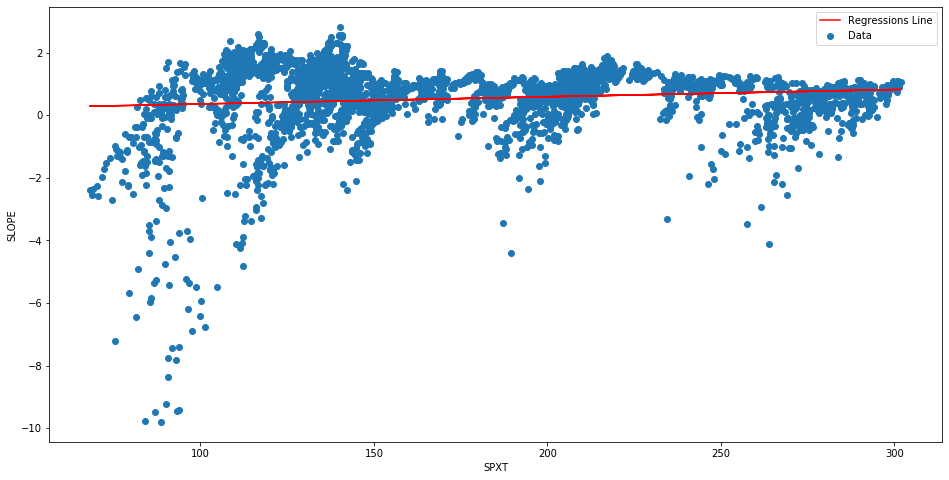

In [75]:
#we will create a scatter plot to dispay the relationship betwee nthe two securities as well as display the 
#regression line 

plt.figure(figsize=(16,8))
plt.scatter(raw_data["SPXT"], raw_data["SLOPE"], label = "Data")
plt.plot(raw_data["SPXT"], regres_line, label = "Regressions Line", color = "r")
plt.xlabel("SPXT")
plt.ylabel("SLOPE")
plt.legend()
plt.show()

 The independent variable SPXT explains only 1.3 % of so this model has a low predictive ability for the depenedent variable. The p values tells us that there is a slim change that this regression line would be any diffrerent from the one we predicted. 

VIXXBEN and SPXT

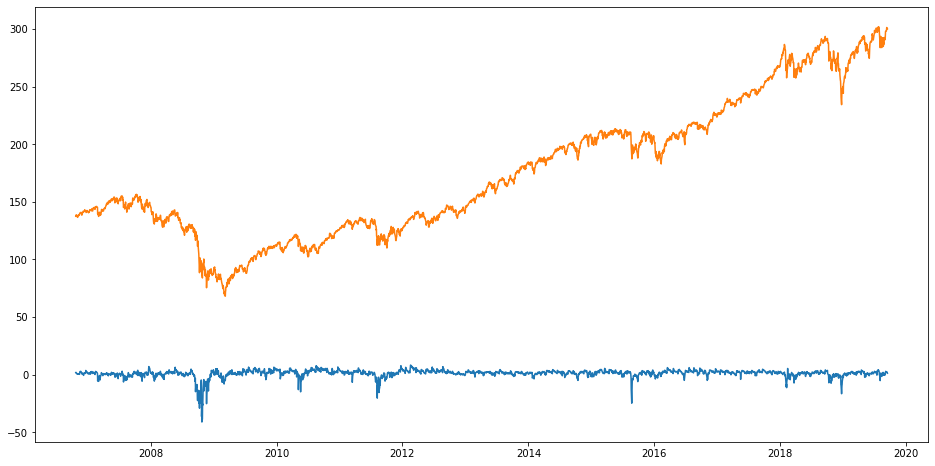

In [81]:
plt.figure(figsize=(16,8))
plt.plot(raw_data.index[0:], raw_data["VIXXBEN"])
plt.plot(raw_data.index[0:], raw_data["SPXT"])
plt.show()

In [99]:
#lts run a regression analysis of the two securities
x_cc = sm.add_constant(raw_data["SPXT"])
y = raw_data["VIXXBEN"]
ben_spxt_model = sm.OLS(y, x_cc).fit()

In [100]:
ben_spxt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                VIXXBEN   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     27.20
Date:                Sat, 16 Nov 2019   Prob (F-statistic):           1.95e-07
Time:                        18:55:09   Log-Likelihood:                -8583.7
No. Observations:                3246   AIC:                         1.717e+04
Df Residuals:                    3244   BIC:                         1.718e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1973      0.188      1.047      0.295      -0.172       0.566
SPXT           0.0053      0.001      5.215      0.000       0.003       0.007
==============================================================================
Omnibus:                     3009.961   Durbin-Watson:                   0.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           157631.506
Skew:                          -4.323   Prob(JB):                         0.00
Kurtosis:                      36.026   Cond. No.                         583.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R_squared tells us the only .8% of the VIXXBEN is explained by SPXT meanign that there is minimum predictive ability between the two. 

In [87]:
#we will run a scatter plot to display the regression line passing through the two points

In [101]:
regoLine = ben_spxt_model.predict()
regoLine

array([0.9266109 , 0.92878619, 0.93127983, ..., 1.79577418, 1.79471306,
       1.78977885])

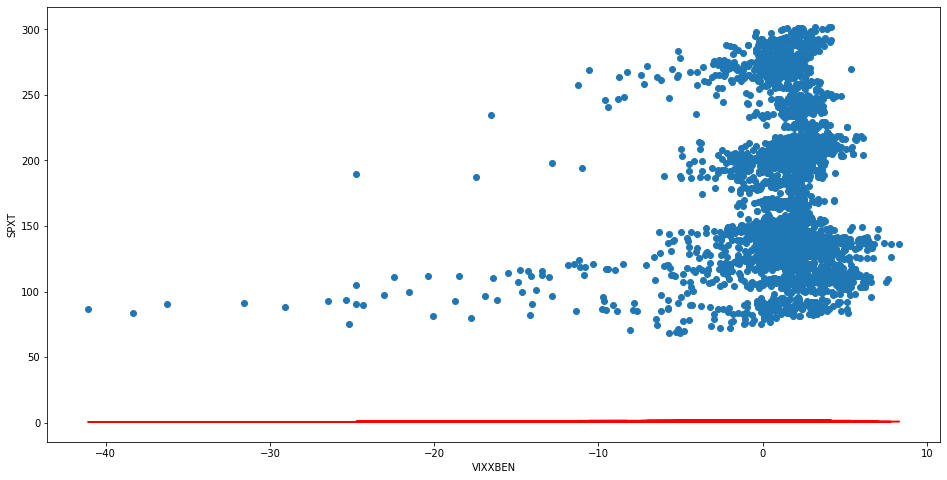

In [102]:
plt.figure(figsize=(16,8))
plt.scatter(raw_data["VIXXBEN"], raw_data["SPXT"], label = "Data")
plt.plot(raw_data["VIXXBEN"], regoLine, label = "REgression", color = "r")
plt.xlabel("VIXXBEN")
plt.ylabel("SPXT")
plt.show()

In [103]:
#lets get the rvalue to calculate the coorelation between the two values 
Results = stats.linregress(raw_data["VIXXBEN"], raw_data["SPXT"])

In [104]:
Results

LinregressResult(slope=1.5669889705244067, intercept=173.75367755150413, rvalue=0.0911801274476242, pvalue=1.9535015849279604e-07, stderr=0.3004778433007416)

In [107]:
r_value = Results.rvalue
r_value ** 2

0.008313815641364993

In [111]:
raw_data

,UVXY,SPXT,VIXXBEN,UX1,UX2,UX3,UX4,VIX,SLOPE
dates,,,,,,,,,
2006-10-23,8.377069e+09,137.47,1.9100,11.950,13.160,14.080,14.600,11.08,0.917
2006-10-24,8.377069e+09,137.88,2.0250,11.780,12.830,14.030,14.470,10.78,0.963
2006-10-25,7.968986e+09,138.35,1.7600,11.490,12.520,13.790,14.520,10.66,1.002
2006-10-26,7.618653e+09,138.78,1.5150,11.250,12.210,13.460,14.180,10.56,0.945
2006-10-27,7.695087e+09,137.91,1.2400,11.310,12.260,13.460,14.240,10.80,0.903
...,...,...,...,...,...,...,...,...,...
2019-09-10,2.730000e+01,298.13,2.2625,16.225,17.675,18.025,17.875,15.20,0.715
2019-09-11,2.661000e+01,300.25,2.4725,15.725,17.325,17.825,17.725,14.61,0.833
2019-09-12,2.565000e+01,301.29,2.1575,14.975,17.025,17.625,17.575,14.22,0.936


VIX And UVXY

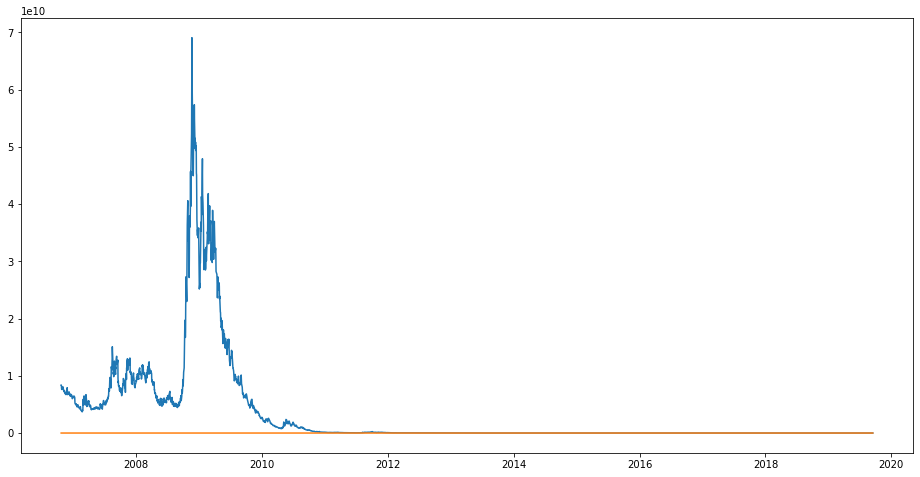

In [115]:
plt.figure(figsize=(16,8))
plt.plot(raw_data.index[0:], raw_data["UVXY"])
plt.plot(raw_data.index[0:], raw_data["VIX"])


In [117]:
# linear regression model 
x_coo = sm.add_constant(raw_data["VIX"])
model = sm.OLS(raw_data["UVXY"], x_coo).fit()

In [118]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   UVXY   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     4764.
Date:                Sat, 16 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:52:45   Log-Likelihood:                -77119.
No. Observations:                3246   AIC:                         1.542e+05
Df Residuals:                    3244   BIC:                         1.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.554e+09   2.05e+08    -46.632      0.000   -9.96e+09   -9.15e+09
VIX         6.627e+08    9.6e+06     69.025      0.000    6.44e+08    6.82e+08
==============================================================================
Omnibus:                      378.925   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2156.564
Skew:                           0.402   Prob(JB):                         0.00
Kurtosis:                       6.911   Cond. No.                         49.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""